ChEn-3170: Computational Methods in Chemical Engineering Fall 2018 UMass Lowell; Prof. V. F. de Almeida **10Sep2018**

# 03. Arrays

---
## Table of Contents
* [Introduction (NumPy](#introduction)
* [NumPy Package](#numpy)
 - [1-D (vector)](#1d)
 - [2-D (matrix)](#2d)
 - [3-D (brick or block or cube)](#3d)
* [Array Slicing (or Views)](#views)
 - [Sampling (Filtering)](#sampling)
* [Notable Matrices](#zeros)
---

## Introduction<a id="introduction"></a>
Arrays are containers of data in a structured form, *i.e.* in a *block* layout. This course uses the n-dimensional array Python package:
+ [NumPy](http://www.numpy.org/): `ndarray` (n-dimensional or multi-dimensional array).
+ [Quick-start tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html):
we need to import `numpy` into the Python interpreter.

## NumPy Package<a id="numpy"></a>
All packages in Python are imported into your session using the `import` *statement*.

In [3]:
'''Python packages are accessed with an import directive as such:'''

import numpy as np  # import the package and create the alias: np

### One-dimensional array (or vector)<a id="1d"></a>
A one-dimensional array or vector is an ordered sequence of numbers.

In [22]:
'''Loading data into "ndarray" using built-in Python data types and the "np.array()" method'''

pylist = [4.5, 8, 90, 1e12, 2.3e-5]        # create a native Python list
mass_cc = np.array(pylist)                 # array() takes a list and converts it into a ndarray
print('mass_cc type =',type(mass_cc))
print('mass_cc length =',mass_cc.size)        # check size with help(np.size)
print('mass_cc =',mass_cc)
print('mass_cc entry dtype =',mass_cc.dtype)  # check type with help(np.dtype)
print('')

species_set = {'water','argon','O2','N2'}
species = np.array(species_set)  
print('species type =',type(species))
print('***species length*** =',species.size)
print('species =',species)
print('***species entry dtype*** =',species.dtype)
print('')

mass_cc type = <class 'numpy.ndarray'>
mass_cc length = 5
mass_cc = [4.5e+00 8.0e+00 9.0e+01 1.0e+12 2.3e-05]
mass_cc entry dtype = float64

species type = <class 'numpy.ndarray'>
***species length*** = 1
species = {'water', 'O2', 'argon', 'N2'}
***species entry dtype*** = object



In [31]:
'''Build an ndarray with the workhorse "np.linspace()" method'''

data = np.linspace(1e-3,1.0,8)        # linspace() is a method of numpy
print('data type =',type(data))
print('data length =',data.size)
print('data =',data)
print('data entry dtype =',data.dtype)

'''Now create a mole fraction data array'''
data_sum = data.sum()                     # "sum()" method adds all elements in "data"
mole_frac = data / data_sum                 # operation: the "data" array is divided by the "data_sum"
print('')
print('mole_frac =',mole_frac)
print('sum       =',mole_frac.sum())     # using sum method of mole_frac

data type = <class 'numpy.ndarray'>
data length = 8
data = [0.001      0.14371429 0.28642857 0.42914286 0.57185714 0.71457143
 0.85728571 1.        ]
data entry dtype = float64

mole_frac = [0.00024975 0.03589268 0.07153561 0.10717854 0.14282146 0.17846439
 0.21410732 0.24975025]
sum       = 1.0


In [ ]:
dir(mole_frac)   # list of methods and attributes available for the `mole_frac` object

In [ ]:
help(mole_frac.sum)  # help for the sum method of `mole_frac` or `ndarray`

In [ ]:
help(np.sum)  # help for the build-in function in `numpy`

In [ ]:
print('sum =', np.sum(mole_frac))   # another way to sum using numpy built-in function np.sum()

In [32]:
'''Accessing "ndarray" data with the indexing operator []'''

print('mole_frac =\n',mole_frac,'\n')
print('mole_frac[0] =',mole_frac[0])   # access the offset 0 item
print('mole_frac[4] =',mole_frac[4])   # access the offset 4 item

'''Accessing slices'''
print('')
print('mole_frac[3:6]       =',mole_frac[3:6])    # print from offset 3 to offset 6

'''Modify slice data'''

mole_frac[3:6] *= 3.2                              # modify the slice by multiplying in-place by 3.2
print('mole_frac[3:6] * 3.2 =', mole_frac[3:6])    # print result

# same as this
#tmp = mole_frac[3:6] * 3.2
#mole_frac[3:6] = tmp

mole_frac =
 [0.00024975 0.03589268 0.07153561 0.10717854 0.14282146 0.17846439
 0.21410732 0.24975025] 

mole_frac[0] = 0.0002497502497502498
mole_frac[4] = 0.1428214642500357

mole_frac[3:6]       = [0.10717854 0.14282146 0.17846439]
mole_frac[3:6] * 3.2 = [0.34297131 0.45702869 0.57108606]


In [33]:
'''Vector magnitude'''

'''one way'''
tmp = mole_frac * mole_frac              # element-by-element multiplication of the vector
print('tmp =\n',tmp)
mag = np.sqrt( tmp.sum() )               # sum of all elements in tmp and take the sqrt
print('magnitude of mole_frac = ', mag )

'''another way'''
print('')
mag = np.sqrt( np.dot(mole_frac, mole_frac) )  # use the scalar product
print('magnitude of mole_frac = ', mag )


tmp =
 [6.23751873e-08 1.28828439e-03 5.11734310e-03 1.17629323e-01
 2.08875219e-01 3.26139284e-01 4.58419450e-02 6.23751873e-02]
magnitude of mole_frac =  0.8759375824596138

magnitude of mole_frac =  0.8759375824596138


**NB: Shared data concept in vectors extend to all arrays.**

In [46]:
'''Vector View (Shared Data)'''

a_vec = np.random.random(8)       
print('a_vec =', a_vec)

b_vec = a_vec           # this is a "view" of the entire a_vec

b_vec[1] = 0.0          # this will change a_vec too
print('b_vec =', b_vec)

a_vec = [0.42625451 0.28867271 0.00830388 0.60035231 0.1632065  0.4119839
 0.01458536 0.63392582]
b_vec = [0.42625451 0.         0.00830388 0.60035231 0.1632065  0.4119839
 0.01458536 0.63392582]


In [56]:
'''Vector View (Shared Data)'''

a_vec = np.random.random(8)       
print('a_vec =', a_vec)

print('')
b_vec = a_vec[3:6]      # this is a view of a_vec data; not a copy
print('b_vec =', b_vec)

b_vec[:] = 0            # setting all elements of b_vec to zero
print('b_vec =', b_vec)

print('a_vec =', a_vec) # a_vec is also changed; shared data

b_vec = 0               # this assigns a new object to b_vec
print('b_vec =', b_vec)

print('a_vec =', a_vec) # note a_vec is left as before b_vec reassigned


a_vec = [0.46538062 0.58212288 0.8548155  0.62280945 0.35499143 0.58032263
 0.10867592 0.02091373]

b_vec = [0.62280945 0.35499143 0.58032263]
b_vec = [0. 0. 0.]
a_vec = [0.46538062 0.58212288 0.8548155  0.         0.         0.
 0.10867592 0.02091373]
b_vec = 0
a_vec = [0.46538062 0.58212288 0.8548155  0.         0.         0.
 0.10867592 0.02091373]


**If you intend to use a copy of the data, use the `np.copy()` method**

In [58]:
'''Vector Copy'''

a_vec = np.random.random(8)
print('a_vec =', a_vec)

b_vec = np.copy(a_vec)      # this is an independent copy of a_vec

a_vec[0] = 0.0              # this will change mole_frac too
print('a_vec =', a_vec)

print('')
print('b_vec =', b_vec)

a_vec = [0.29677381 0.47324566 0.65016989 0.25670218 0.26704971 0.59773534
 0.22656235 0.11354305]
a_vec = [0.         0.47324566 0.65016989 0.25670218 0.26704971 0.59773534
 0.22656235 0.11354305]

b_vec = [0.29677381 0.47324566 0.65016989 0.25670218 0.26704971 0.59773534
 0.22656235 0.11354305]


### Two-dimensional array (or matrix)<a id="2d"></a>
A two-dimensional array or matrix, is a collection of numbers ordered into rows and columns.

In [83]:
'''Using "array()" to create a 2-D "np.ndarray"'''

data = [[4.5, 8, 90, 1e12, 2.3e-5, -8],     # note line continuation
        [0, 3.1, 10, 3000, 0.1234, -1.2],
        [3, 5.9, 40, 1e-2, 2.3301, 78]
       ]
mass_cc = np.array(data)
print('mass_cc type =',type(mass_cc))
print('mass_cc length =',mass_cc.size)        # check size with help(np.size)
print('mass_cc shape =',mass_cc.shape)        # check shape with help(np.shape)
print('mass_cc =\n',mass_cc)
print('mass_cc entry dtype =',mass_cc.dtype)  # check type with help(np.dtype)

mass_cc type = <class 'numpy.ndarray'>
mass_cc length = 18
mass_cc shape = (3, 6)
mass_cc =
 [[ 4.5000e+00  8.0000e+00  9.0000e+01  1.0000e+12  2.3000e-05 -8.0000e+00]
 [ 0.0000e+00  3.1000e+00  1.0000e+01  3.0000e+03  1.2340e-01 -1.2000e+00]
 [ 3.0000e+00  5.9000e+00  4.0000e+01  1.0000e-02  2.3301e+00  7.8000e+01]]
mass_cc entry dtype = float64


In [84]:
'''Not a matrix'''

data = [[4.5, 8, 90, 1e12, 2.3e-5, -8],          # note line continuation
        [0, 3.1, 10, 3000, 0.1234, -1.2, 7.8],   # note extra element in this row; could be unintentional
        [3, 5.9, 40, 1e-2, 2.3301, 78]
       ]
not_mtrx = np.array(data)
print('not_mtrx type =',type(not_mtrx))
print('not_mtrx length =',not_mtrx.size)        # check size with help(np.size)
print('not_mtrx shape =',not_mtrx.shape)        # check shape with help(np.shape)
print('not_mtrx =\n',not_mtrx)
print('not_mtrx entry dtype =',not_mtrx.dtype)  # check type with help(np.dtype)

not_mtrx type = <class 'numpy.ndarray'>
not_mtrx length = 3
not_mtrx shape = (3,)
not_mtrx =
 [list([4.5, 8, 90, 1000000000000.0, 2.3e-05, -8])
 list([0, 3.1, 10, 3000, 0.1234, -1.2, 7.8])
 list([3, 5.9, 40, 0.01, 2.3301, 78])]
not_mtrx entry dtype = object


In [85]:
'''Access elements of the 2-D array; use double indexing, e.g., name[i,j]'''

print('mass_cc[0,0] =', mass_cc[0,0])   # single element on the diagonal 0,0
print('mass_cc[1,1] =', mass_cc[1,1])   # single element on the diagonal 1,1

mass_cc[0,0] = 4.5
mass_cc[1,1] = 3.1


In [86]:
'''More on using "array()" to create a 2-D "np.ndarray"'''

data = [np.linspace(1,5,5),         # first row   5 elements
        range(5),                   # second row  5 elements
        np.random.random(5)*3.0     # third row   5 elements  
       ]
mass_cc = np.array(data)
print('mass_cc type =',type(mass_cc))
print('mass_cc shape =',mass_cc.shape)        # check shape with help(np.shape)
print('mass_cc length =',mass_cc.size)        # check size with help(np.size)
print('mass_cc =\n',mass_cc)
print('mass_cc entry dtype =',mass_cc.dtype)  # check type with help(np.dtype)

mass_cc type = <class 'numpy.ndarray'>
mass_cc shape = (3, 5)
mass_cc length = 15
mass_cc =
 [[1.         2.         3.         4.         5.        ]
 [0.         1.         2.         3.         4.        ]
 [1.70796025 0.94809375 0.8660589  1.74243239 2.08240179]]
mass_cc entry dtype = float64


In [87]:
'''Views of the 2-D array'''

print('mass_cc 1st row =',mass_cc[0,:])  # use the colon operator inside the indexing operator
print('mass_cc 2nd row =',mass_cc[1,:])  # use the colon operator inside the indexing operator
print('mass_cc 3nd row =',mass_cc[2,:])  # use the colon operator inside the indexing operator

print('mass_cc 1st column =',mass_cc[:,0])  # use the colon operator inside the indexing operator
print('mass_cc 2nd column =',mass_cc[:,1])  # use the colon operator inside the indexing operator
print('mass_cc 3rd column =',mass_cc[:,2])  # use the colon operator inside the indexing operator
print('mass_cc 4th column =',mass_cc[:,3])  # use the colon operator inside the indexing operator
print('mass_cc 5th column =',mass_cc[:,4])  # use the colon operator inside the indexing operator

mass_cc 1st row = [1. 2. 3. 4. 5.]
mass_cc 2nd row = [0. 1. 2. 3. 4.]
mass_cc 3nd row = [1.70796025 0.94809375 0.8660589  1.74243239 2.08240179]
mass_cc 1st column = [1.         0.         1.70796025]
mass_cc 2nd column = [2.         1.         0.94809375]
mass_cc 3rd column = [3.        2.        0.8660589]
mass_cc 4th column = [4.         3.         1.74243239]
mass_cc 5th column = [5.         4.         2.08240179]


[[ 51.         102.         153.         204.         255.        ]
 [  0.          51.         102.         153.         204.        ]
 [ 87.1059728   48.35278109  44.16900379  88.86405169 106.20249111]]


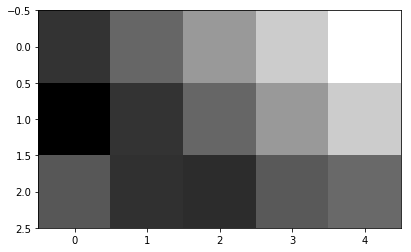

In [88]:
'''Visualize a matrix as image'''

from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package

plt.figure(1)     # create a figure placeholder

'''scale the matrix to 0-1'''
#tmp = mass_cc / mass_cc.max()    # element by element division
#mass_cc = tmp                    # reassigment
mass_cc /= mass_cc.max()          # scaling on the fly; same as previous two

'''scale the matrix to 0-255'''
mass_cc *= 255

print(mass_cc)
plt.imshow(mass_cc,cmap='gray')

In [89]:
print('mass_cc upper left quadrant =\n', mass_cc[0:3,0:3])

mass_cc upper left quadrant =
 [[ 51.         102.         153.        ]
 [  0.          51.         102.        ]
 [ 87.1059728   48.35278109  44.16900379]]


In [90]:
print('mass_cc upper right quadrant =\n', mass_cc[0:3,3:])

mass_cc upper right quadrant =
 [[204.         255.        ]
 [153.         204.        ]
 [ 88.86405169 106.20249111]]


In [91]:
'''Zeros matrix'''

mass_cc = np.zeros((4,3))     # 4x3 matrix with zeros
print('zero matrix (4,3) =\n',mass_cc)

zero matrix (4,3) =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [92]:
'''Identity matrix: I ("square"; i.e.: m x m or m rows and m columns)'''

mass_cc = np.eye(4,4)
print('identity matrix (4,4) =\n',mass_cc)

identity matrix (4,4) =
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [93]:
'''Diagonal matrix (square; m x m or rows and m columns)'''

mass_cc = np.diag( range(7) )    # provide the diagonal as a vector
print('diagonal (7x7) =\n',mass_cc)

diagonal (7x7) =
 [[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 4 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 6]]


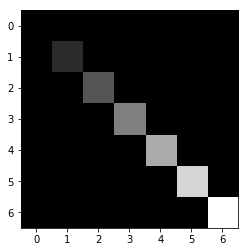

In [94]:
'''Visualize a matrix as image'''
from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package

plt.figure(2)                        # create a figure placeholder
plt.imshow(mass_cc,cmap='gray')

### Three-dimensional array (brick)<a id="3d"></a>

In [4]:
'''Using "array()" to create a 3-D "np.ndarray"'''

data = [
        [ [4.5, 8, 90, 1e12, 2.3e-5],     # 1st matrix
          [0, 3.1, 10, 3000, 0.1234]
        ],
        [ [2.1, -7, 31, 2e12, 0.22],     # second matrix
          [0,  1.1, 21, 3876, 1024]
        ],
        [ [1,   -7,  4,    0, 0.22],     # third matrix
          [0,  1.1, 21, -3e4, -234]
        ]
       ]
mass_cc = np.array(data)                      # create the ndarray
print('mass_cc type =',type(mass_cc))
print('mass_cc length =',mass_cc.size)        # check size with help(np.size)
print('mass_cc shape =',mass_cc.shape)        # check shape with help(np.shape)
print('mass_cc =\n',mass_cc)
print('mass_cc entry dtype =',mass_cc.dtype)  # check type with help(np.dtype)

mass_cc type = <class 'numpy.ndarray'>
mass_cc length = 30
mass_cc shape = (3, 2, 5)
mass_cc =
 [[[ 4.500e+00  8.000e+00  9.000e+01  1.000e+12  2.300e-05]
  [ 0.000e+00  3.100e+00  1.000e+01  3.000e+03  1.234e-01]]

 [[ 2.100e+00 -7.000e+00  3.100e+01  2.000e+12  2.200e-01]
  [ 0.000e+00  1.100e+00  2.100e+01  3.876e+03  1.024e+03]]

 [[ 1.000e+00 -7.000e+00  4.000e+00  0.000e+00  2.200e-01]
  [ 0.000e+00  1.100e+00  2.100e+01 -3.000e+04 -2.340e+02]]]
mass_cc entry dtype = float64


In [5]:
'''Access elements of the 3-D array; use triple indexing, e.g., variable_name[i,j,k]'''

print('mass_cc[0,0,0] =',mass_cc[0,0,0])
print('mass_cc[2,1,4] =',mass_cc[2,1,4])

mass_cc[0,0,0] = 4.5
mass_cc[2,1,4] = -234.0


In [6]:
'''Views of the 3-D array'''

print('mass_cc 1st stack =\n',mass_cc[0,:,:])  # use the colon operator inside the indexing operator
print('mass_cc 2nd stack =\n',mass_cc[1,:,:])  # use the colon operator inside the indexing operator
print('mass_cc 3rd stack =\n',mass_cc[2,:,:])  # use the colon operator inside the indexing operator

mass_cc 1st stack =
 [[4.500e+00 8.000e+00 9.000e+01 1.000e+12 2.300e-05]
 [0.000e+00 3.100e+00 1.000e+01 3.000e+03 1.234e-01]]
mass_cc 2nd stack =
 [[ 2.100e+00 -7.000e+00  3.100e+01  2.000e+12  2.200e-01]
 [ 0.000e+00  1.100e+00  2.100e+01  3.876e+03  1.024e+03]]
mass_cc 3rd stack =
 [[ 1.00e+00 -7.00e+00  4.00e+00  0.00e+00  2.20e-01]
 [ 0.00e+00  1.10e+00  2.10e+01 -3.00e+04 -2.34e+02]]


In [59]:
'''3D Array of Random Numbers'''

mass_cc = np.random.random((8,5,6)) # random number generator in NumPy; pass only one argument; say tuple or list
mass_cc *= 255
mass_cc = mass_cc.astype(int)  # assign int data type
print('mass_cc =\n', mass_cc)

mass_cc =
 [[[ 36  91 182 167  77  27]
  [ 11 110 189 102  65 215]
  [172 110   6 206  35 113]
  [154  23   1 246 211 148]
  [180  53  47 102  46  38]]

 [[118 233 252 238 102  86]
  [ 58 210 223  95  84  16]
  [ 90 124  70 137 100   0]
  [ 92 222  95  72  86 239]
  [153 154 189  14  52  24]]

 [[254 123 141 110 124 123]
  [ 34  76  18   2  24 165]
  [134 181 103 142 242  50]
  [250 141  48 189 139 112]
  [  9 150  63  93  86  95]]

 [[210   4 129 177 181 176]
  [  6   2  73 164  60  12]
  [ 49  13 114 217 194 196]
  [170  93 238 252 233 192]
  [185  29 111 197 159 206]]

 [[ 57  72 170  33  53  94]
  [195 241  73 230 227 222]
  [ 93 245 194 170  63 187]
  [103  54  55 219  76  74]
  [ 62  24  99 168 216  95]]

 [[ 53  99 182 125  91 153]
  [165 233  92 186 105 185]
  [206 183 137  31 210  93]
  [119 207  70 144 239 252]
  [ 29 184 116 141 119 122]]

 [[169 230  41 115 216  44]
  [218 160 239 137  71  58]
  [ 82 100 236  73 202 173]
  [ 48 117   4 105  57  39]
  [240 235 152  37  57 17

In [ ]:
help(plt.subplot)

Text(0,0.5,'time')

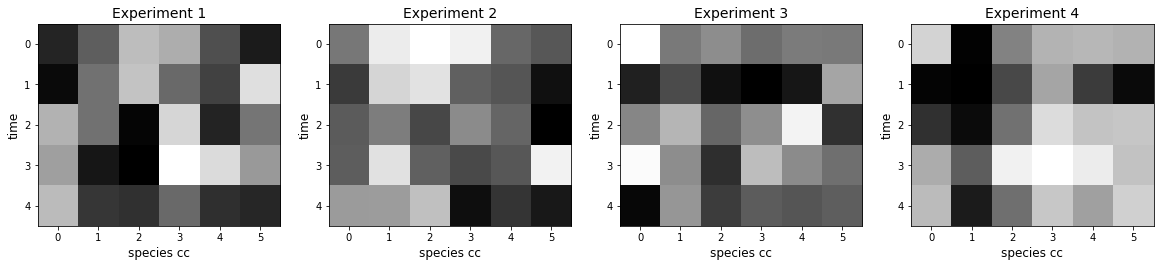

In [60]:
'''Visualize a 3-D Data Block'''

from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package
plt.rcParams['figure.figsize'] = [20, 4] # extend the figure size on screen output

plt.figure(3)              # create a figure placeholder

plt.subplot(141)         # layout of plots: 1 row 4 columns
plt.imshow( mass_cc[0,:,:],cmap='gray' )
plt.title('Experiment 1',fontsize=14)
plt.xlabel('species cc',fontsize=12)
plt.ylabel('time',fontsize=12)

plt.subplot(142)
plt.imshow( mass_cc[1,:,:],cmap='gray' )
plt.title('Experiment 2',fontsize=14)
plt.xlabel('species cc',fontsize=12)
plt.ylabel('time',fontsize=12)

plt.subplot(143)
plt.imshow( mass_cc[2,:,:],cmap='gray' )
plt.title('Experiment 3',fontsize=14)
plt.xlabel('species cc',fontsize=12)
plt.ylabel('time',fontsize=12)

plt.subplot(144)
plt.imshow( mass_cc[3,:,:],cmap='gray' )
plt.title('Experiment 4',fontsize=14)
plt.xlabel('species cc',fontsize=12)
plt.ylabel('time',fontsize=12)

mass_cc shape = (8, 5, 6)


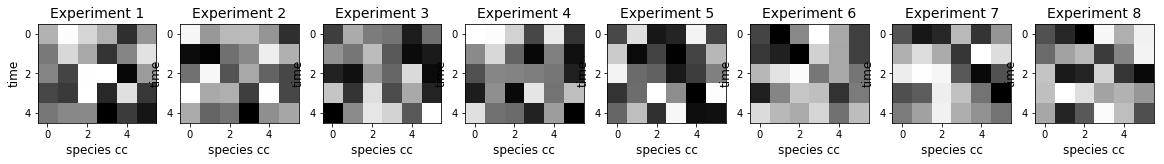

In [10]:
'''Automate the Visualization of a 3D Block of Data'''

plt.figure(4)       # create a figure place holder
n_rows = 1
n_columns = mass_cc.shape[0]
print('mass_cc shape =', mass_cc.shape)

for i in range(n_columns):
    plt.subplot(n_rows,n_columns, i+1)
    plt.imshow(mass_cc[i,:,:], cmap='gray')
    plt.title('Experiment '+str(i+1),fontsize=14)
    plt.xlabel('species cc',fontsize=12)
    plt.ylabel('time',fontsize=12)

In [ ]:
help(plt.imshow)

Text(0.5,1,'Noisy Color Image (3D Block)')

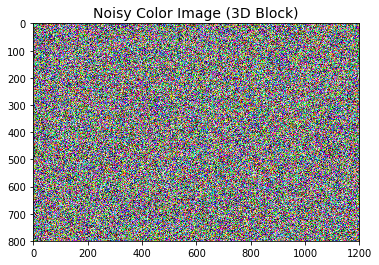

In [61]:
'''Color Image as a 3D Block Array'''

plt.figure(5)       # create a figure place holder
color_image = np.random.random((800,1200,3))  # 3 channels: R, G, B
plt.imshow(color_image)
plt.title('Noisy Color Image (3D Block)',fontsize=14)

## Array Slicing (or Views)<a id="views"></a>
Slicing or views are subset of data contained in a given array. Data is accessed using indexing operation, `[]`, in conjunction with the colon operator `:`.

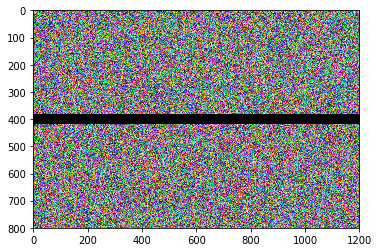

In [62]:
'''Visualize Data Slice in 3D'''

color_image[380:420,:] = 0   # black color stripe
plt.figure(6)
plt.imshow(color_image)

In [ ]:
'''Image Reading into a Python Session'''

help(plt.imread)   # use the matplotlib package

block type = <class 'numpy.ndarray'>
block shape = (300, 400, 3)


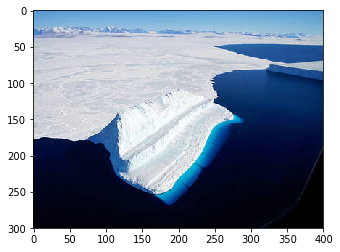

In [64]:
'''3-D Block Visualization of Color Images'''

# copy URL of image in the images/ course repository;
# click on the image link, use the Download buttom to create this URL
block = plt.imread('https://raw.githubusercontent.com/dpploy/chen-3170/master/images/glacier.png',format='png')

plt.imshow(block)
print('block type =',type(block))  # inspect the array shape
print('block shape =',block.shape)  # inspect the array shape

plt.imshow(block)

Text(0,0.5,'intensity')

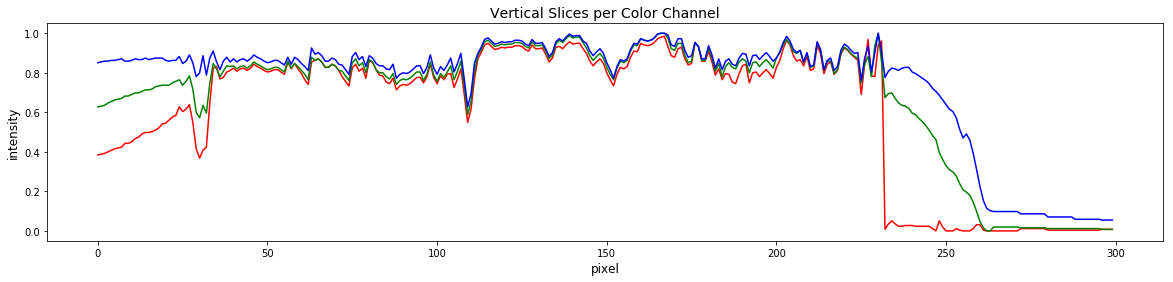

In [65]:
'''Vertical Slice (View)'''

r_vec = block[:,200,0] # slice the red channel (stack) at column 200
g_vec = block[:,200,1] # slice the green channel (stack) at column 200
b_vec = block[:,200,2] # slice the blue channel (stack) at column 200

plt.plot(range(300),r_vec,'r',g_vec,'g',b_vec,'b') # plot all three slices
plt.title('Vertical Slices per Color Channel',fontsize=14)
plt.xlabel('pixel',fontsize=12)
plt.ylabel('intensity',fontsize=12)

Text(0.5,1,'Vertical Line at Pixel 200')

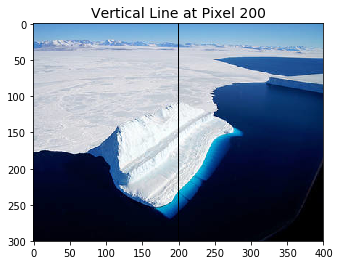

In [66]:
'''Indicate the Vertical Slice Position'''

block_mod = block        # note block_mod shares data with block
block_mod[:,200,:] = 0
plt.imshow(block_mod)
plt.title('Vertical Line at Pixel 200',fontsize=14)

Text(0.5,1,'Red Vertical Line at Pixel 200')

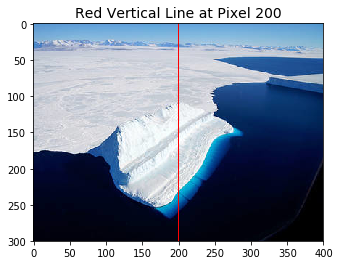

In [17]:
'''Change Color of the Vertical Line'''

block_mod[:,200,0] = 1   # set the red channel to 1
block_mod[:,200,1] = 0   # set the others to zero (already were)
block_mod[:,200,2] = 0
plt.imshow(block_mod)
plt.title('Red Vertical Line at Pixel 200',fontsize=14)

Text(0.5,1,'Upper Left 100x100 Block')

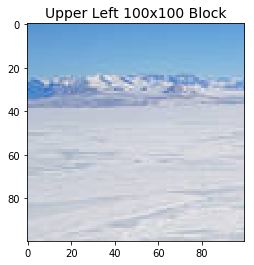

In [67]:
'''Create a View of the Data'''

sub_block = block[:100,:100,:]  # upper left 100x100 sub-block of the data
plt.imshow(sub_block)
plt.title('Upper Left 100x100 Block',fontsize=14)

Text(0.5,1,'Upper Left 100x100 Mask')

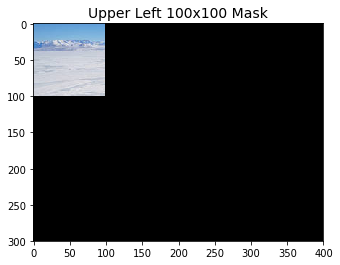

In [114]:
'''Mask the 100x100 Data'''

masked = block           # shared data

masked[100:,:,:] = 0     # lower sub-block mask
plt.imshow(masked)

masked[:,100:,:] = 0     # right sub-block mask
plt.imshow(masked)
plt.title('Upper Left 100x100 Mask',fontsize=14)

Text(0.5,1,'Upper Left 100x100 Red Mask')

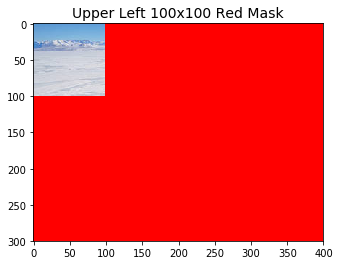

In [115]:
'''Red Mask the 100x100 Data'''

masked = block

masked[100:,:,:] = 0     # lower sub-block mask
plt.imshow(masked)
masked[:,100:,:] = 0     # right sub-block mask
plt.imshow(masked)

masked[100:,:,0] = 1     # lower sub-block mask
plt.imshow(masked)
masked[:,100:,0] = 1     # right sub-block mask
plt.imshow(masked)
plt.title('Upper Left 100x100 Red Mask',fontsize=14)

Text(0.5,1,'Original Has Been Modified')

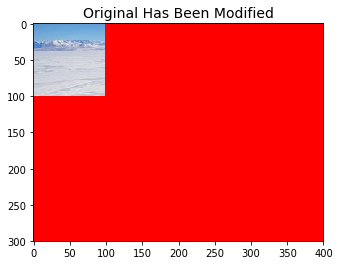

In [116]:
'''View the Original Block'''

plt.imshow(block)  # the image has been modified all along
plt.title('Original Has Been Modified',fontsize=14)

### Sampling or Filtering<a id="sampling"></a>

block type = <class 'numpy.ndarray'>
block shape = (300, 400, 3)


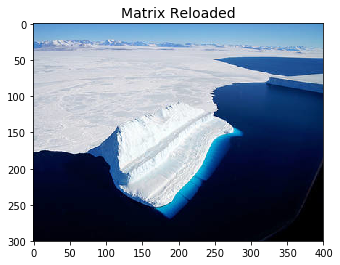

In [117]:
'''Reload Block Data'''

# copy URL of image in the images/ course repository;
# click on the image link, use the Download buttom to create this URL
block = plt.imread('https://raw.githubusercontent.com/dpploy/chen-3170/master/images/glacier.png',format='png')

plt.imshow(block)
plt.title('Matrix Reloaded',fontsize=14)
print('block type =',type(block))  # inspect the array shape
print('block shape =',block.shape)  # inspect the array shape

coarse shape = (60, 80, 3)


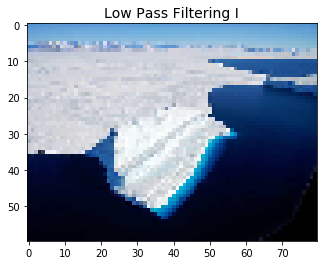

In [119]:
'''Coarsening the Data'''

coarse = block[::5,::5,:]   # use the step option in the colon operator indexing
plt.imshow(coarse)
plt.title('Low Pass Filtering I',fontsize=14)
print('coarse shape =', coarse.shape)

very_coarse = (30, 40, 3)


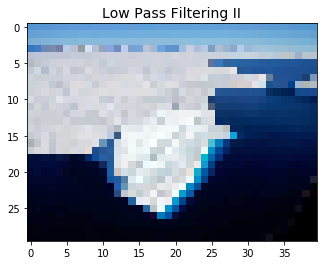

In [120]:
'''More Coarsening of the Data'''

very_coarse = block[::10,::10,:]
plt.imshow(very_coarse)
plt.title('Low Pass Filtering II',fontsize=14)
print('very_coarse =', very_coarse.shape)

Text(0,0.5,'intensity')

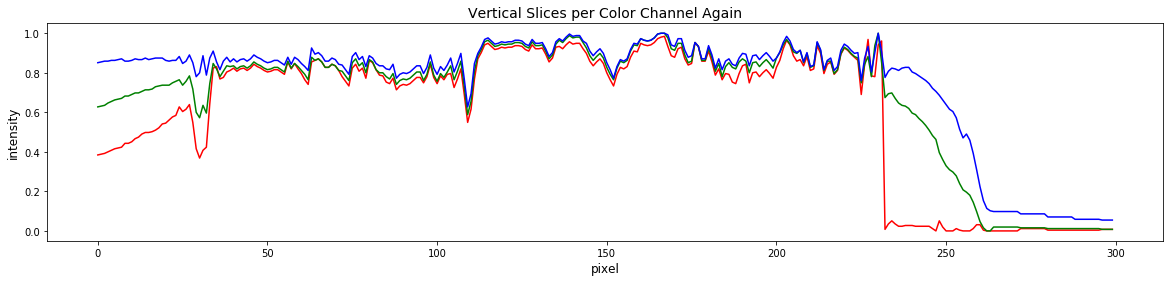

In [121]:
'''Vertical Slice (View) Again'''

r_vec = block[:,200,0] # slice the red channel (stack) at column 200
g_vec = block[:,200,1] # slice the green channel (stack) at column 200
b_vec = block[:,200,2] # slice the blue channel (stack) at column 200

plt.plot(range(300),r_vec,'r',g_vec,'g',b_vec,'b') # plot all three slices
plt.title('Vertical Slices per Color Channel Again',fontsize=14)
plt.xlabel('pixel',fontsize=12)
plt.ylabel('intensity',fontsize=12)

Text(0,0.5,'intensity')

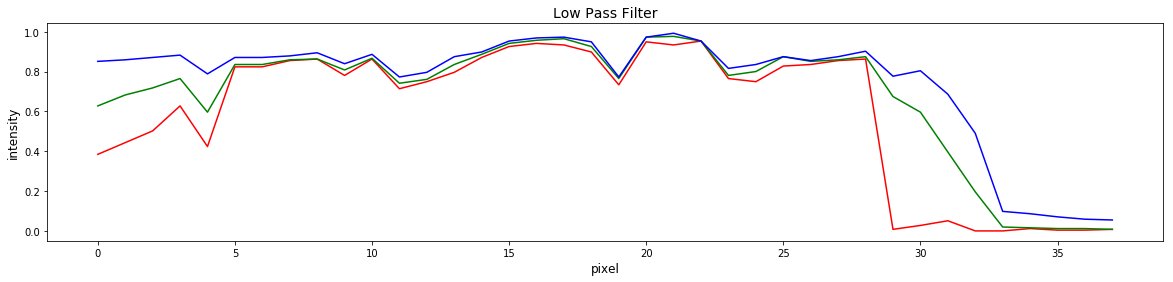

In [113]:
'''Corsening the Vertical Slice (View)'''

r_vec = block[::8,200,0] # slice the red channel (stack) at column 200
g_vec = block[::8,200,1] # slice the green channel (stack) at column 200
b_vec = block[::8,200,2] # slice the blue channel (stack) at column 200

n_pixels = r_vec.size

plt.plot(range(n_pixels),r_vec,'r',g_vec,'g',b_vec,'b') # plot all three slices
plt.title('Low Pass Filter',fontsize=14)
plt.xlabel('pixel',fontsize=12)
plt.ylabel('intensity',fontsize=12)

## Notable Matrices<a id="zeros"></a>

In [ ]:
'''Zeros'''
mtrx = np.zeros((2,3))
print('Ones matrix 2x3\n',mtrx)

In [ ]:
'''Ones'''
mtrx = np.ones((4,3))
print('Ones matrix 4x3\n',mtrx)

In [73]:
'''Identity (square)'''

'''one way'''
mtrx = np.eye(4)
print('Identity matrx 4x4 \n',mtrx)

'''another way'''
mtrx = np.diag(np.ones(4))
print('Identity matrix 4x4 \n',mtrx)

Identity matrx 4x4 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Identity matrix 4x4 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [75]:
'''Empty (not really)'''

mtrx = np.empty((4,5))
print('Empty mtrx 4x5 \n',mtrx)

mtrx[:,:] = 2.0  # initialize
print('Initialized mtrx 4x5\n', mtrx)

Empty mtrx 4x5 
 [[ 0.1   0.15  0.2   0.25  0.3 ]
 [ 0.4   0.5   0.6   0.8   1.  ]
 [ 1.5   2.    2.5   3.    4.  ]
 [ 5.    6.    8.   10.   15.  ]]
Initialized mtrx 4x5
 [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]
